In [ ]:
# Datenbeschreibung
## Vorhersage der Unfallart (`crash_type`)
In diesem Notizbuch wird der Datensatz zu Verkehrsunfällen (traffic_accidents.csv) analysiert.

In [1]:
import pandas as pd

data = pd.read_csv("C:/Users/Eyild/Downloads/archive (1)/traffic_accidents.csv")
print(data.head())

               crash_date traffic_control_device weather_condition  \
0  07/29/2023 01:00:00 PM         TRAFFIC SIGNAL             CLEAR   
1  08/13/2023 12:11:00 AM         TRAFFIC SIGNAL             CLEAR   
2  12/09/2021 10:30:00 AM         TRAFFIC SIGNAL             CLEAR   
3  08/09/2023 07:55:00 PM         TRAFFIC SIGNAL             CLEAR   
4  08/19/2023 02:55:00 PM         TRAFFIC SIGNAL             CLEAR   

       lighting_condition first_crash_type trafficway_type  \
0                DAYLIGHT          TURNING     NOT DIVIDED   
1  DARKNESS, LIGHTED ROAD          TURNING        FOUR WAY   
2                DAYLIGHT         REAR END  T-INTERSECTION   
3                DAYLIGHT            ANGLE        FOUR WAY   
4                DAYLIGHT         REAR END  T-INTERSECTION   

            alignment roadway_surface_cond road_defect  \
0  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN   
1  STRAIGHT AND LEVEL                  DRY  NO DEFECTS   
2  STRAIGHT AND LEVEL           

In [ ]:
## 2.1
Die Zielvariable ist `crash_type`, die die Schwere des Unfalls angibt. Es gibt zwei Hauptkategorien:

- `NO INJURY / DRIVE AWAY` 
- `INJURY AND / OR TOW DUE TO CRASH`

In [ ]:
## (2.2) Statistische Kennzahlen

### Numerische Felder:
Für die numerischen Felder wurden die folgenden Kennzahlen berechnet: Median, Standardabweichung, Minimum und Maximum.

### Kategorische Felder:
Für die kategorischen Felder wurde die Häufigkeit jeder Kategorie ermittelt sowie die häufigste Kategorie bestimmt. 


In [2]:
# numerischen Spalten
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    print(f"Statistische Kennzahlen für {col}:")
    print(f"Median: {data[col].median()}")
    print(f"Standardabweichung: {data[col].std()}")
    print(f"Minimum: {data[col].min()}")
    print(f"Maximum: {data[col].max()}")
    print("-" * 40)


Statistische Kennzahlen für num_units:
Median: 2.0
Standardabweichung: 0.39601188281348276
Minimum: 1
Maximum: 11
----------------------------------------
Statistische Kennzahlen für injuries_total:
Median: 0.0
Standardabweichung: 0.7997199800505953
Minimum: 0.0
Maximum: 21.0
----------------------------------------
Statistische Kennzahlen für injuries_fatal:
Median: 0.0
Standardabweichung: 0.04750164090768463
Minimum: 0.0
Maximum: 3.0
----------------------------------------
Statistische Kennzahlen für injuries_incapacitating:
Median: 0.0
Standardabweichung: 0.2339635630072055
Minimum: 0.0
Maximum: 7.0
----------------------------------------
Statistische Kennzahlen für injuries_non_incapacitating:
Median: 0.0
Standardabweichung: 0.6149596972692436
Minimum: 0.0
Maximum: 21.0
----------------------------------------
Statistische Kennzahlen für injuries_reported_not_evident:
Median: 0.0
Standardabweichung: 0.45086501269532775
Minimum: 0.0
Maximum: 15.0
----------------------------------

In [3]:
# kategorische Spalten
categorical_columns = data.select_dtypes(include=['object']).columns


for col in categorical_columns:
    print(f"Statistische Kennzahlen für {col}:")
    
    
    print(f"Häufigste Kategorie: {data[col].mode()[0]}")
    
    
    print(f"Anzahl der Vorkommen:")
    print(data[col].value_counts())  # Häufigkeit jeder Kategorie
    
    print("-" * 40)

Statistische Kennzahlen für crash_date:
Häufigste Kategorie: 12/29/2020 05:00:00 PM
Anzahl der Vorkommen:
crash_date
12/29/2020 05:00:00 PM    10
02/17/2022 03:30:00 PM     8
11/26/2018 08:30:00 AM     6
06/05/2021 01:00:00 PM     6
09/11/2019 04:30:00 PM     6
                          ..
03/20/2022 03:08:00 PM     1
07/13/2020 07:25:00 PM     1
09/25/2023 04:01:00 PM     1
08/18/2023 03:00:00 PM     1
09/20/2023 02:38:00 PM     1
Name: count, Length: 189087, dtype: int64
----------------------------------------
Statistische Kennzahlen für traffic_control_device:
Häufigste Kategorie: TRAFFIC SIGNAL
Anzahl der Vorkommen:
traffic_control_device
TRAFFIC SIGNAL              123944
STOP SIGN/FLASHER            49139
NO CONTROLS                  29508
UNKNOWN                       4455
OTHER                          670
YIELD                          468
PEDESTRIAN CROSSING SIGN       247
OTHER REG. SIGN                181
LANE USE MARKING               153
FLASHING CONTROL SIGNAL        15

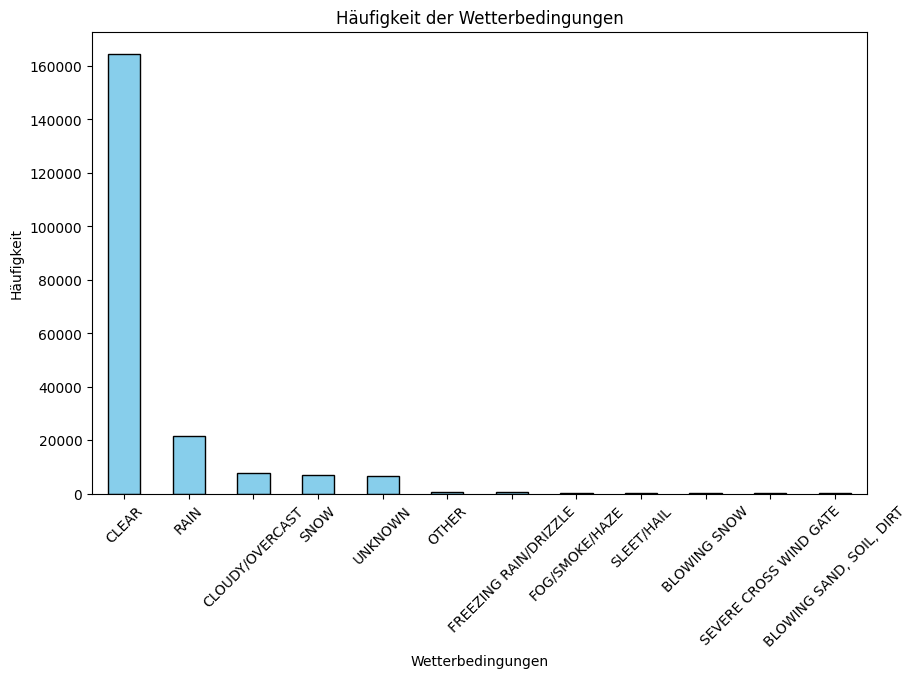

In [7]:
# 2.3
## Erstellen eines Balkendiagramms für weather_condition

import matplotlib.pyplot as plt  


plt.figure(figsize=(10, 6))
data['weather_condition'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Häufigkeit der Wetterbedingungen')
plt.xlabel('Wetterbedingungen')
plt.ylabel('Häufigkeit')
plt.xticks(rotation=45)
plt.show()


In [ ]:
##2.4
Die Skalierung ist in diesem Datensatz nicht nötig, da Entscheidungsbäume verwendet werden.
Diese Modelle benötigen keine skalierten Daten, da sie auf den Unterschieden zwischen den Werten basieren und keine Berechnungen von Distanzen machen.
Eine Skalierung würde daher keinen Einfluss auf die Leistung des Modells haben. Entscheidungsbäume werden hier verwendet, um die Schwere des 
Unfalls (z.B. „crash_type“) basierend auf anderen Merkmalen wie „weather_condition“ oder „injuries_total“ vorherzusagen. 
Da Entscheidungsbäume keine Distanzen berechnen, ist eine Skalierung nicht erforderlich.